In [38]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
data = pd.read_csv("smoke_detection_iot.csv").drop(['Index', 'UTC', 'CNT'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(data.drop('Fire Alarm', axis=1), data['Fire Alarm'], test_size=0.2)
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


<BarContainer object of 2 artists>

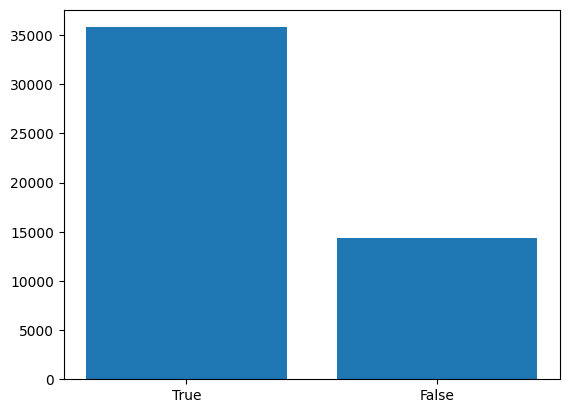

In [40]:
plt.bar(['True', 'False'], [y_train.sum(), len(y_train) - y_train.sum()])

In [41]:
x_train.corr()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
Temperature[C],1.000000,-0.245026,0.082957,0.080461,-0.136814,-0.037908,-0.251323,0.041539,0.037982,0.040983,0.037607,0.032506
Humidity[%],-0.245026,1.000000,-0.491405,-0.369162,0.246772,0.070010,0.692732,-0.234900,-0.173709,-0.280210,-0.168853,-0.111512
TVOC[ppb],0.082957,-0.491405,1.000000,0.619871,-0.654728,-0.673735,-0.220670,0.598667,0.472497,0.679011,0.462105,0.336627
eCO2[ppm],0.080461,-0.369162,0.619871,1.000000,-0.686387,-0.515118,-0.320880,0.678977,0.576703,0.721941,0.567638,0.453649
Raw H2,-0.136814,0.246772,-0.654728,-0.686387,1.000000,0.631284,0.299859,-0.532673,-0.427378,-0.595942,-0.418596,-0.311784
Raw Ethanol,-0.037908,0.070010,-0.673735,-0.515118,0.631284,1.000000,-0.077779,-0.481322,-0.388980,-0.535185,-0.381232,-0.286661
Pressure[hPa],-0.251323,0.692732,-0.220670,-0.320880,0.299859,-0.077779,1.000000,-0.258551,-0.245844,-0.243959,-0.244141,-0.218938
PM1.0,0.041539,-0.234900,0.598667,0.678977,-0.532673,-0.481322,-0.258551,1.000000,0.955725,0.937814,0.949463,0.855364
PM2.5,0.037982,-0.173709,0.472497,0.576703,-0.427378,-0.388980,-0.245844,0.955725,1.000000,0.794142,0.999788,0.969928
NC0.5,0.040983,-0.280210,0.679011,0.721941,-0.595942,-0.535185,-0.243959,0.937814,0.794142,1.000000,0.781461,0.622345


In [42]:
vals = x_train.corrwith(y_train)
print(vals)

Temperature[C]   -0.164647
Humidity[%]       0.400950
TVOC[ppb]        -0.214823
eCO2[ppm]        -0.100748
Raw H2            0.108001
Raw Ethanol      -0.341005
Pressure[hPa]     0.252796
PM1.0            -0.111199
PM2.5            -0.083703
NC0.5            -0.130913
NC1.0            -0.081502
NC2.5            -0.055378
dtype: float64


In [43]:
features = vals.keys()
corr_list = [(val, key) for val, key in zip(vals[features], features)]

Text(0, 0.5, 'Humidity[%]')

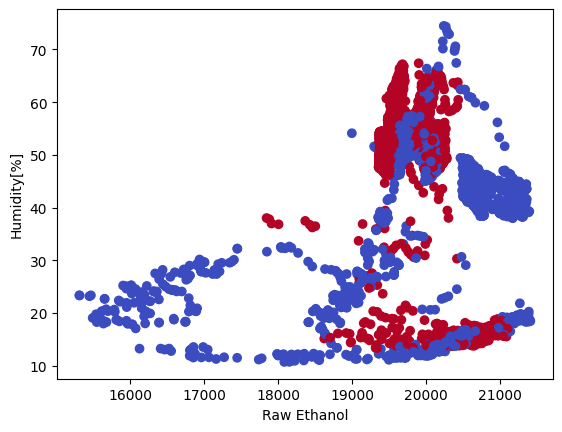

In [44]:
plt.scatter(x_test["Raw Ethanol"], x_test["Humidity[%]"], c=y_test, cmap="coolwarm")
plt.xlabel("Raw Ethanol")
plt.ylabel("Humidity[%]")

Text(0, 0.5, 'Humidity[%]')

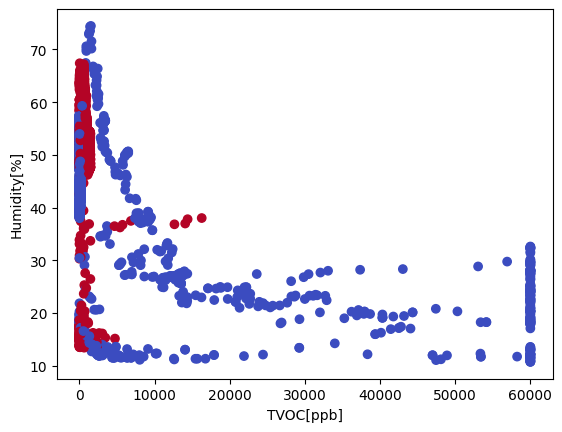

In [45]:
plt.scatter(x_test["TVOC[ppb]"], x_test["Humidity[%]"], c=y_test, cmap="coolwarm")
plt.xlabel("TVOC[ppb]")
plt.ylabel("Humidity[%]")

In [46]:
log_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
print(f"Accuracy: {log_reg_accuracy}")
print(f"Recall: {log_reg_recall}")

Accuracy: 0.8936611847357496
Recall: 0.9487408067751282


In [47]:
num_depths = 10
dec_trees = [None]*num_depths
dec_tree_accuracies = [0]*num_depths
dec_tree_recalls = [0]*num_depths

for i in range(num_depths):
    dec_trees[i] = make_pipeline(
        StandardScaler(),
        DecisionTreeClassifier(max_depth=i+1, random_state=42)
    )
    dec_trees[i].fit(x_train, y_train)
    dec_tree_pred = dec_trees[i].predict(x_test)
    dec_tree_accuracies[i] = accuracy_score(y_test, dec_tree_pred)
    dec_tree_recalls[i] = recall_score(y_test, dec_tree_pred)


Text(0.5, 1.0, 'Decision Tree Accuracy vs Model Depth')

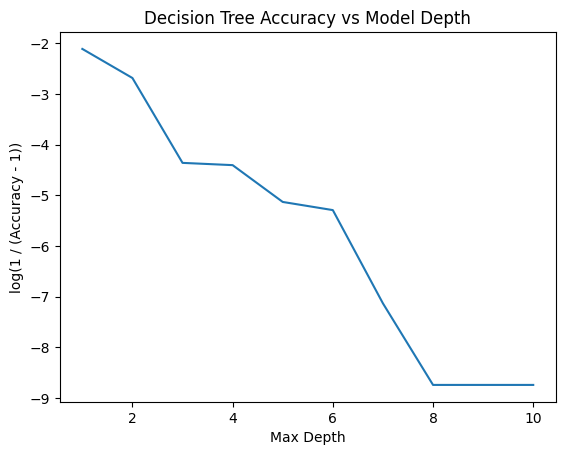

In [58]:
plt.plot(range(1,num_depths+1), np.log(1 - np.array(dec_tree_accuracies)))
plt.xlabel('Max Depth')
plt.ylabel('log(1 - Accuracy)')
plt.title('Decision Tree Accuracy vs Model Depth')

In [49]:
rand_for = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(n_estimators=1, max_depth=10, random_state=42)
)

rand_for.fit(x_train, y_train)
rand_for_pred = rand_for.predict(x_test)
rand_for_accuracy = accuracy_score(y_test, rand_for_pred)
rand_for_recall = recall_score(y_test, rand_for_pred)
print(f"Accuracy: {rand_for_accuracy}")
print(f"Recall: {rand_for_recall}")


Accuracy: 0.9973654798020118
Recall: 0.9987742366837531


In [50]:
sensors = None
scaler = StandardScaler().fit(x_train)
accuracies = [[0]*3]*4

for i in range(4):
    for j in range(3):
        nn_model = Sequential()
        for _ in range(j+1):
            nn_model.add(Dense(1*(i+1), activation='relu'))
        nn_model.add(Dense(1, activation='sigmoid'))
        nn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
        nn_model.fit(scaler.transform(x_train), y_train, epochs=5, batch_size=32, validation_split=0.2)
        model_eval = nn_model.evaluate(scaler.transform(x_test), y_test)
        accuracies[i][j] = model_eval[1]


Epoch 1/5
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.7881 - loss: 0.6031 - val_accuracy: 0.8540 - val_loss: 0.4201
Epoch 2/5
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.8639 - loss: 0.3725 - val_accuracy: 0.8709 - val_loss: 0.2960
Epoch 3/5
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.8824 - loss: 0.2729 - val_accuracy: 0.8985 - val_loss: 0.2380
Epoch 4/5
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - accuracy: 0.9009 - loss: 0.2286 - val_accuracy: 0.9119 - val_loss: 0.2113
Epoch 5/5
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.9104 - loss: 0.2103 - val_accuracy: 0.9168 - val_loss: 0.1997
392/392 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.9142 - loss: 0.2034
Epoch 1/5
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.6417 - loss: 0.6647 - val_accuracy: 0.7190 - val_loss: 0.6005
Epoch 2/5
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.7264 - loss: 0.5893 - val_accuracy: 0.7296 - val_loss: 0.5832
Epoch 

1: 0.962637722492218
2: 0.962637722492218
3: 0.962637722492218


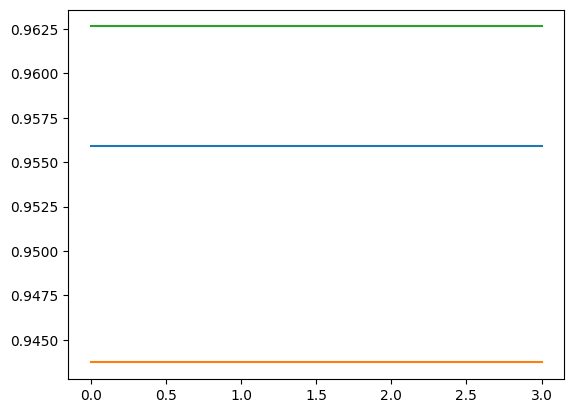

In [51]:
fig = plt.plot(accuracies)
print("1: {}\n2: {}\n3: {}".format(accuracies[1][2], accuracies[2][2], accuracies[3][2]))